In [2]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments_SjrDbSgB9IU.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=SjrDbSgB9IU,Fallout 76 Angry Review,2018-11-27T06:20:30Z,@TheLostMind88,"This game is still broken, and one of the wors...",2024-11-11T09:31:03Z,0,0
1,https://www.youtube.com/watch?v=SjrDbSgB9IU,Fallout 76 Angry Review,2018-11-27T06:20:30Z,@Drew-vz8lf,Since its launch Fallout 76 has been cursed.,2024-11-09T17:51:54Z,0,0
2,https://www.youtube.com/watch?v=SjrDbSgB9IU,Fallout 76 Angry Review,2018-11-27T06:20:30Z,@flowtech3988,Lmfao,2024-11-07T17:41:46Z,0,0
3,https://www.youtube.com/watch?v=SjrDbSgB9IU,Fallout 76 Angry Review,2018-11-27T06:20:30Z,@TheArchDemon729,To describe the creation engine would to compa...,2024-10-27T11:56:54Z,0,0
4,https://www.youtube.com/watch?v=SjrDbSgB9IU,Fallout 76 Angry Review,2018-11-27T06:20:30Z,@kefflan,Would be fun to see Joe take a look at the gam...,2024-10-25T22:09:57Z,0,1
...,...,...,...,...,...,...,...,...
9995,https://www.youtube.com/watch?v=SjrDbSgB9IU,Fallout 76 Angry Review,2018-11-27T06:20:30Z,@simoncooper9916,Been waiting for you to do a review on this!! ...,2018-12-01T21:47:26Z,0,0
9996,https://www.youtube.com/watch?v=SjrDbSgB9IU,Fallout 76 Angry Review,2018-11-27T06:20:30Z,@brettwatkin6186,Just like every online game ....fuckin gash !!!,2018-12-01T21:46:57Z,0,0
9997,https://www.youtube.com/watch?v=SjrDbSgB9IU,Fallout 76 Angry Review,2018-11-27T06:20:30Z,@Kerrigan1000,At 20min in that screamign guy is too loud. Wa...,2018-12-01T21:46:41Z,0,0
9998,https://www.youtube.com/watch?v=SjrDbSgB9IU,Fallout 76 Angry Review,2018-11-27T06:20:30Z,@adriansz9547,And they are going to use THE SAME ENGINE for ...,2018-12-01T21:46:12Z,0,0


In [4]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['harry', 'potter', 'hogwarts','legacy',
    'like', 'take', 'studio', 'got', 'people', 'get', 
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])

new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
     'like', 'take', 'studio', 'got', 'people', 'get',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','video','game','give',
    'fallout','lol','gon','ive','fuck','fucking','lmno','want','better','one','first',
    'would','see','played','lmao'
])
lmtzr = WordNetLemmatizer()

In [5]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams

In [6]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
7346,2018-12-04,Classic Joe is the best Joe :-D,classic joe best joe
7347,2018-12-04,Damn...Angry Joe definitely lived up to his na...,damnangry joe lived name lol
7348,2018-12-04,Bethesda doesn't make very good online games l...,bethesda doesnt good game lol stick single pla...
7349,2018-12-04,You know something went horribly wrong when th...,something went horribly wrong enjoyable experi...
7350,2018-12-04,Well it’s time to head back to the Mojave anyo...,head back mojave anyone wan come
...,...,...,...
9995,2018-12-01,Been waiting for you to do a review on this!! ...,waiting first line fucked knew gon angry joe f...
9996,2018-12-01,Just like every online game ....fuckin gash !!!,every game fuckin gash
9997,2018-12-01,At 20min in that screamign guy is too loud. Wa...,20min screamign guy loud loud pvp grip agree y...
9998,2018-12-01,And they are going to use THE SAME ENGINE for ...,going use engine elder scroll goood luuuuck go...


In [7]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

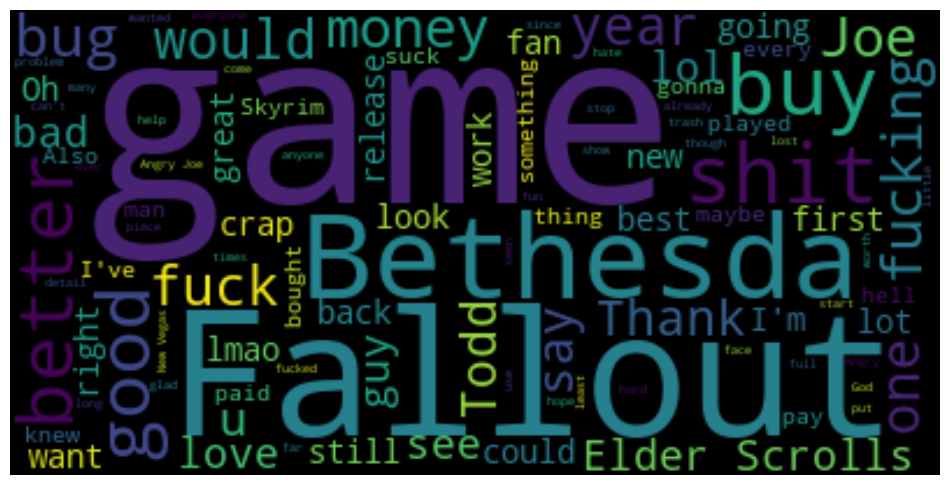

In [8]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df



The video has mostly negative comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2018-12-03,“16x the details”,16x detail,neutral
1,2018-12-02,"Difference between Sean and Todd, Sean promise...",difference sean todd sean promised couldnt del...,negative
2,2018-12-02,"If you paid for this game, you are part of the...",paid game part problem,negative
3,2018-12-03,So glad I didn't buy this piece of shit,glad buy piece shit,negative
4,2018-12-02,Angry Joe: I've never seen a game price drop t...,angry joe ive seen game price drop fast battle...,negative
...,...,...,...,...
495,2018-12-03,How can anyone dislike this video? I don’t get...,anyone dislike buy fallout glad seeing horribl...,negative
496,2018-12-04,The Todd reminds me a lot of the 40 year old v...,todd reminds lot year old virgin character,neutral
497,2018-12-02,How did this game a 3/10?,game 310,neutral
498,2018-12-03,The 6.8k who downvoted this video were the mas...,68k downvoted master race fallout developer be...,neutral


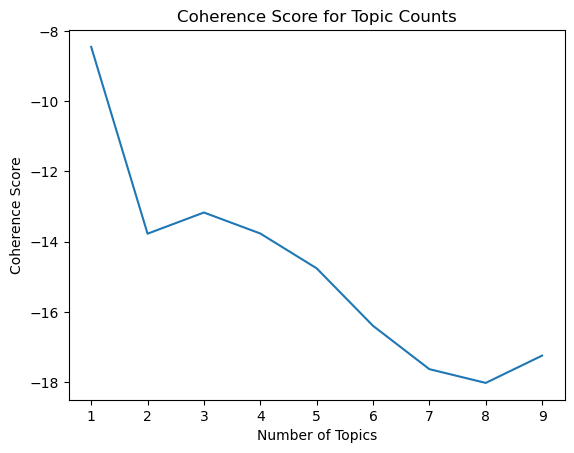

In [10]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [11]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 1
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.004*"bethesda" + 0.003*"buy" + 0.003*"good" + 0.003*"shit" + 0.003*"bug" + 0.002*"joe" + 0.002*"new" + 0.002*"todd" + 0.002*"elder" + 0.002*"scroll"')]


1 topic has the highest coherence score, which suggests that this may be the optimal choice for maximizing coherence.
we also have one major topic in the biagrams, so 1 is fine.

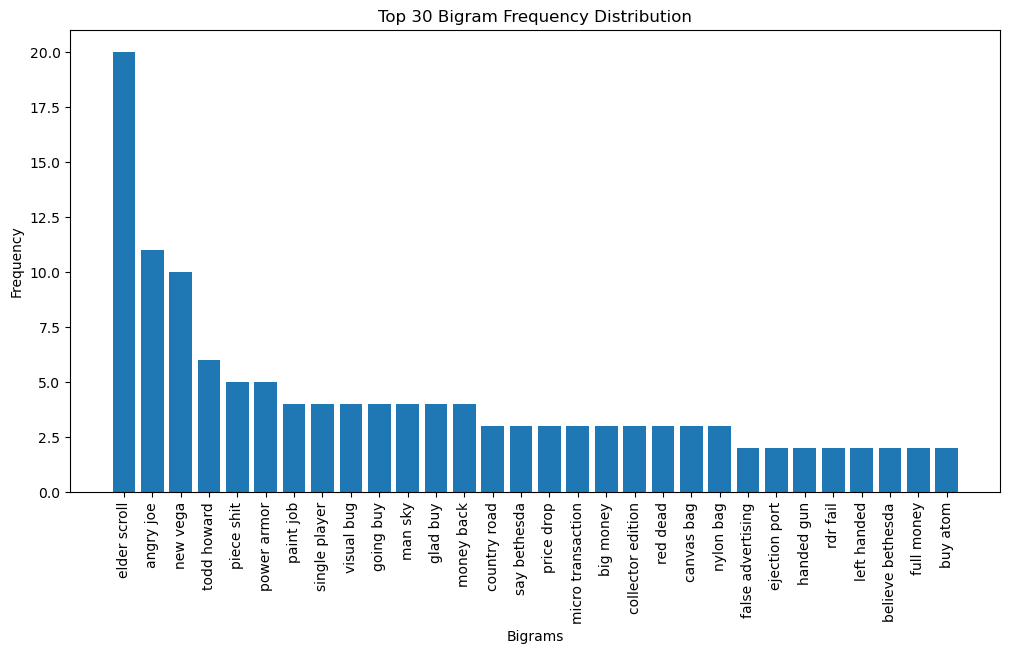

In [13]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [14]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
#df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_bad_topics.to_csv(file_path, index=False)
#df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
